In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# for Data-Vilsualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing data 
crime_data_1 = pd.read_csv("../input/RS_Session_246_AS11.csv")
crime_data_2 = pd.read_csv("../input/RS_Session_246_AU_98_1.1.csv")

# Preprocessing 

In [ ]:
# Overview of the Data 1
crime_data_1.head()

In [ ]:
crime_data_1.tail(10)

In [ ]:
# We have rows stating Total number of Crimes in States/UTs 
# Removing them as it not important as of now
crime_data_1.drop([29,37,38],axis=0,inplace=True)
crime_data_1.shape

In [ ]:
# Overview of the Data 2
crime_data_2.head()

In [ ]:
crime_data_2.tail(10)

In [ ]:
crime_data_2.drop([36],axis=0,inplace=True)
crime_data_2.shape

In [ ]:
# Making States as Index in both DataFrame
crime_data_1.rename(columns={"States/UTs":"State/UT"},inplace=True)
crime_data_1.set_index(crime_data_1["State/UT"],inplace=True)
crime_data_1.head()

In [ ]:
crime_data_1.drop(["State/UT"],axis=1,inplace=True)

In [ ]:
crime_data_2.set_index(crime_data_2["State/UT"],inplace=True)
crime_data_2.drop(["State/UT"],axis=1,inplace=True)
crime_data_2.head()

In [ ]:
crime_data_1.index

In [ ]:
crime_data_2.index

In [ ]:
# Index with different name format :
# data1             data2
# A & N Islands     A & N Island
# D&N Haveli        D & N Haveli
# Delhi UT          Delhi
# Making changes in one of the dataFrame
crime_data_1.rename(index={"A & N Islands":"A & N Island","D&N Haveli":"D & N Haveli","Delhi UT" : "Delhi"},inplace=True)

In [ ]:
# Merging both DataFrames 
data = pd.concat([crime_data_1,crime_data_2],axis=1)
data.head()

In [ ]:
data.shape

In [ ]:
# Removing duplicate columns
data.drop(["2015 - Total rape Cases","2016 - Total rape Cases"],axis=1,inplace=True)
data.head()

# Exploratory Data Analysis 

In [ ]:
# Index, Datatype and Memory information
data.info()
# All columns are in proper format

### Data information :
* Number of States = 29
* Number of Uts    = 7

### Rape & Total Cases data of Years :
2014,2015,2016

### Assault & Murder Data of Years :
2015,2016

## Things we could do :
* Analysis of crime by Direction wise grouping of states/UTs
* Adding a new feature "Increase in crime rates with time(Years)"
* State wise analysis
* <del>Comparision between States and UTs</del>
* Are there any other factors related with number of crimes? *(Though we don't have data of other facors)*

## State/UTs wise analysis

In [ ]:
# Figure Size
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=data["2014 - Cases registered"],ci=None,label="2014")
sns.lineplot(x=data.index,y=data["2015 - Cases registered"],ci=None,label="2015")
sns.lineplot(x=data.index,y=data["2016 - Cases registered"],ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2014-2015-2016 Total Cases Registered")
plt.ylabel("Total Cases registered")
plt.legend()


### Observations :
* Uttar Pradesh is having a big rise in crime(2015-16) as compared to the other States
* As compared to other small States(by Population or Area) *Assam* has very high number in Crime Cases
* To gain more insights we could analyze "Total number of Case Registered" with population in State

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=data["2014 - Total rape Cases"],ci=None,label="2014")
sns.lineplot(x=data.index,y=data["Rape - 2015"],ci=None,label="2015")
sns.lineplot(x=data.index,y=data["Rape - 2016"],ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2014-2015-2016 Total Rape Cases")
plt.ylabel("Total Rape Cases")
plt.legend()


### Observations : 
* Same as we have seen above : Uttar Pradesh has a very big rise in number of Rape Cases(2015-2016)
* Where on the other side Madhya Pradesh has highest number of Rape Cases from 2014-2016
* Maharashtra has 2nd highest and 3rd highest number of Rape Cases in 2015 and 2016 respectively
* Karnataka has major decrease in rape cases from 2014-2015 but major rise from 2015-2016
* We will see % of rape cases in every state to gain more insights

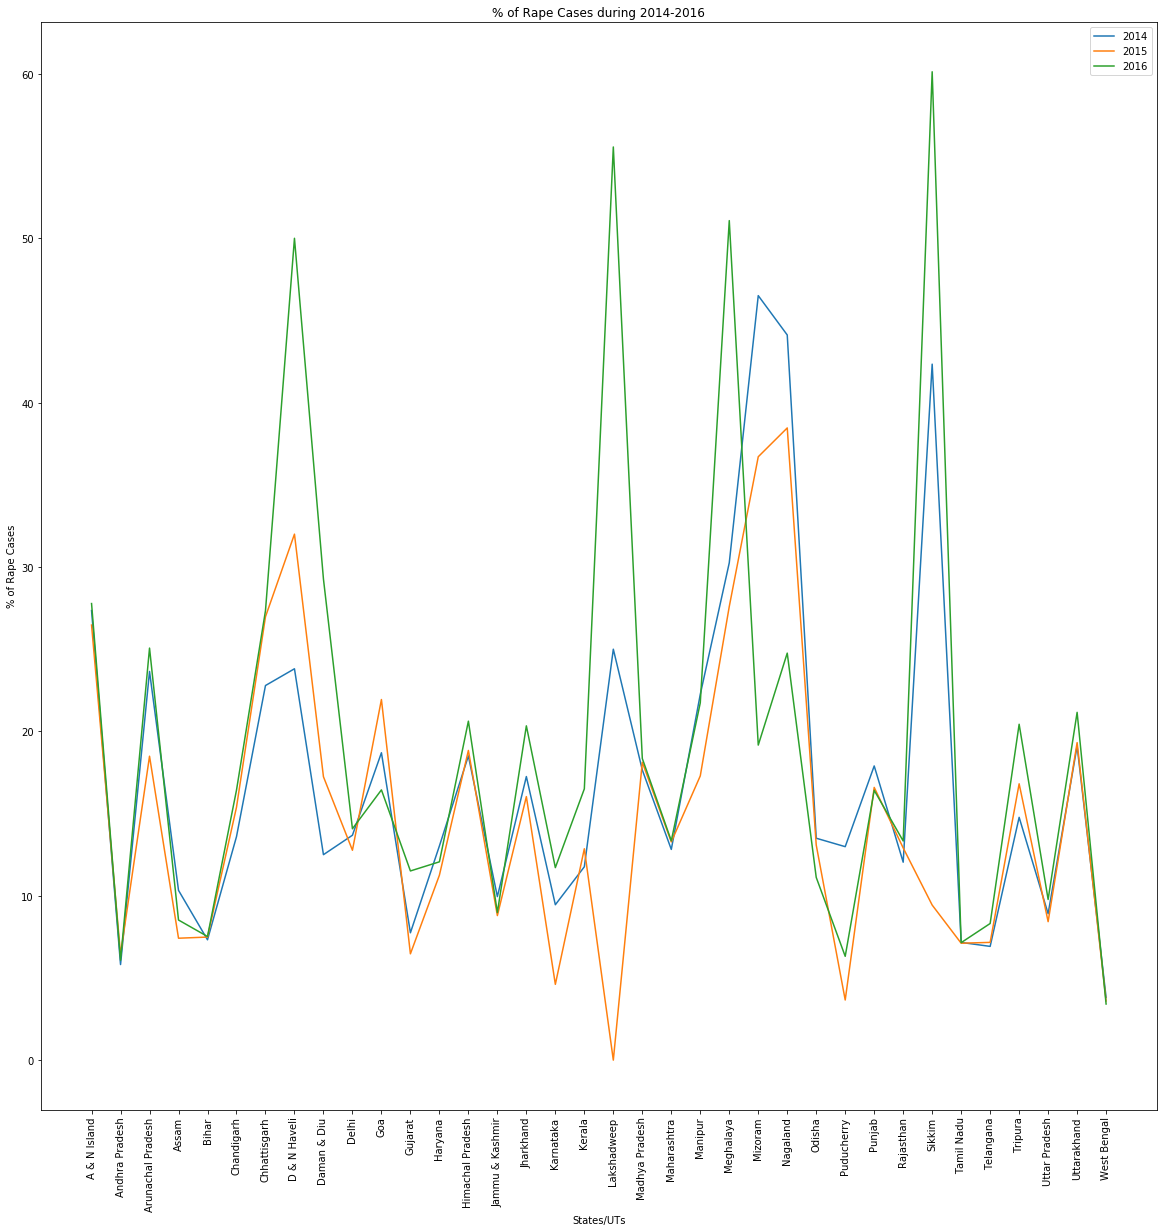

In [64]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["2014 - Total rape Cases"]/data["2014 - Cases registered"])*100,ci=None,label="2014")
sns.lineplot(x=data.index,y=(data["Rape - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Rape - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("% of Rape Cases during 2014-2016")
plt.ylabel("% of Rape Cases")
plt.legend()

### Observations : 
* We can see most of the UTs have % of Rape Cases higher than % of other cases
* D & N Haveli, Lakshdweep, Meghalaya & Sikkim have very big rise in % of Rape cases (2015-16)
* On the other hand Goa, Mizoram & Nagaland have drop in % of Rape Cases (2015-2016)
* **Mizoram & Nagaland are the only Sates which have decrease in % of Rape Cases during (2014-2016)**
* **Andhra Pradesh, Bihar, Jammu & Kashmir, Tamilnadu, Telangana, Uttar Pradesh & West Bengal have Rape Crime less than 10% as compared to other crimes in State**

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["Assaults (molestation) - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Assaults (molestation) - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2015-2016 % of Assaults (Molestation) Cases")
plt.ylabel("% of Assaults( Molestation) Cases")
plt.legend()

### Observations : 
* Bihar is the only State which has Assaults less than 5%
* Goa, Jammu & Kashmir, Karnataka, Kerala, Maharashtra, Mizoram, Odissa & Pundcherry have Assaults Cases more than 35%
* States that has rise in Rape cases has drop in Assault Cases
* **Mizoram** is the state which has high rise in Assault Cases during (2015-2016)
* Gujarat, Jharkhand, Nagaland, Rajasthan, Tamilnadu & West Bengal have Assault Cases % b/w (10-20)

In [ ]:
plt.figure(figsize=(20,20))

# Seaborn LinePlots
sns.lineplot(x=data.index,y=(data["Murder (women) - 2015"]/data["2015 - Cases registered"])*100,ci=None,label="2015")
sns.lineplot(x=data.index,y=(data["Murder (women) - 2016"]/data["2016 - Cases registered"])*100,ci=None,label="2016")

# Matplotlib Additional Features
plt.xlabel("States/UTs")
plt.xticks(rotation=90)
plt.title("2015-2016 % of Murder Cases")
plt.ylabel("% of Murder Cases")
plt.legend()

### Observations : 
* Murders are **less** in % as compared to Rapes and Assaults across all States
* **(0-2)%** : Assam, Chandigarh, Delhi, Jammu&Kashmir, Lakshdweep & Rajasthan
* Goa, Manipur, **Mizoram**, Tamilnadu, **Tripura** & West Bengal have **rise** in Murder % 
* D&N Haveli, Daman & Diu, Nagaland, Meghalaya & Punducherry have high **drop** in Murder %
* % more than 8 in both of the years : Tamilnadu

### Zone wise Analysis

In [ ]:
State_UT = []
UTs = ["A & N Island","D & N Haveli","Delhi","Puducherry","Chandigarh","Daman & Diu","Lakshadweep"]
for st in data.index:
    if st not in UTs:
        State_UT.append("State")
    else:
        State_UT.append("UT")
temp = pd.concat([data,pd.DataFrame(data={"State_UT":pd.Series(State_UT,index=data.index)})],axis=1)
temp.head()

In [ ]:
North_India = ["Delhi","Haryana","Jammu & Kashmir","Himachal Pradesh","Uttar Pradesh","Punjab","Uttarakhand"]
West_India = ["D & N Haveli","Daman & Diu","Goa","Gujarat","Maharashtra","Rajasthan"]
South_India = ["Kerala", "Tamil Nadu", "Karnataka", "Andhra Pradesh","Telangana","Puducherry"]
Middle_India = ["Madhya Pradesh","Chhattisgarh"]
East_India = ["Odisha","West Bengal","Bihar","Jharkhand"]
North_East_India = ["Sikkim","Meghalaya","Assam","Arunachal Pradesh","Nagaland","Manipur","Tripura","Mizoram"]
Island_India = ["A & N Island","Lakshadweep"]

### North India

In [ ]:
def directionwise(li,col):
    r = []
    for i in li:
        r.append(temp.loc[i,col])
    return pd.Series(r)

In [ ]:
def PlotDirectionWise(List,col1,col2,title,ylabel):
    
    plt.figure(figsize=(5,5))

    sns.barplot(x=pd.Series(List),y=(directionwise(List,col1)/directionwise(List,col2))*100,hue=directionwise(List,"State_UT"))

    plt.xlabel("States/UTs")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend()

In [ ]:
#PlotDirectionWise(North_India,"2014 - Total rape Cases","2014 - Cases registered","% of Rape Cases - 2014","% of Rape Cases")
#PlotDirectionWise(North_India,"Rape - 2015","2015 - Cases registered","% of Rape Cases - 2015","% of Rape Cases")
PlotDirectionWise(North_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest  Rape Case % in 2016 : Jammu & Kashmir,Uttar Pradesh, Haryana
* Highest Rape Case % in 2016 : Uttrakhand, Himachal Pradesh, Punjab

In [ ]:
PlotDirectionWise(North_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest : Haryana, Punjab, Uttrakhand
* Highest : J & K, Himachal Pradesh, Delhi

In [ ]:
PlotDirectionWise(North_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lowest : Delhi, Jammu & Kashmir, Himachal Pradesh, Haryana
* Highest : Punjab, Uttrakhand (>2.5%)

### Haryana, Delhi & Uttar Pradesh are more safe in North India!!

### West India 

In [ ]:
PlotDirectionWise(West_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : Gujarat,Maharashtra, Rajasthan
* Highest % : D & N Haveli, Daman & Diu

In [ ]:
PlotDirectionWise(West_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : D & N Haveli, Daman & Diu, Gujarat, Rajasthan
* Highest % : Goa, Maharashtra

In [ ]:
PlotDirectionWise(West_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* (Murder % is less (<5%))
* Lowest %  : Daman & Diu, Rajasthan, Maharashtra, Gujarat
* Highest % : Goa, D & N Haveli

### Gujarat & Rajasthan are more safe!!

### South India

In [ ]:
PlotDirectionWise(South_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : (<10%) Andhra Pradesh, Puducherry, Tamil Nadu, Telengana
* Highest % : (>10%) Kerala, Karnataka

In [ ]:
PlotDirectionWise(South_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : (<20%) Tamil Nadu 
* Highest % : (>20%) Puducherry, Kerala, Karnataka, Andhra Pradesh, Telengana

In [ ]:
PlotDirectionWise(South_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lowest %  : (<4%) Kerala, Telangana, Andhra Pradesh, Karnataka
* Highest % : (>4%) Tamilnadu, Puducherry

### Telangana & Andhra Pradesh is more safe!!

### Middle India

In [ ]:
PlotDirectionWise(Middle_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Chhatisgarh has Rape % more than 25

In [ ]:
PlotDirectionWise(Middle_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Not a huge difference between both states

In [ ]:
PlotDirectionWise(Middle_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Madhya Pradesh has less % of Murder Cases

### Madhya Pradesh is more safe than Chattisgarh!!

### East India 

In [ ]:
PlotDirectionWise(East_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : West Bengal 
* Highest % : Jharkhand

In [ ]:
PlotDirectionWise(East_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : Bihar 
* Highest % : Odisha (>40%)

In [ ]:
PlotDirectionWise(East_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Murder (<3.5%)
* Lowest : Bihar
* Highest : Odisha

### Bihar & West Bengal are more safe!!

### North-East India

In [ ]:
PlotDirectionWise(North_East_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* Lowest %  : Assam (<10%) & Mizoram (~19%) & Arunachal Pradesh, Nagaland, Manipur, Tripura (20-30)%
* Highest % : Sikkim & Meghalay (>50%)

In [ ]:
PlotDirectionWise(North_East_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lowest %  : Nagaland  (~15%)
* Highest % : Mozoram > 55%

In [ ]:
PlotDirectionWise(North_East_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lowest %  : Assam,Arunachal Pradesh, Meghalaya, Sikkim < 5%
* Highest % : Mizoram,Nagaland,Manipur,Tripura > 6%

### Assam & Tripura are more safe!!

### Indian Islands

In [ ]:
PlotDirectionWise(Island_India,"Rape - 2016","2016 - Cases registered","% of Rape Cases - 2016","% of Rape Cases")

### Observations : 
* A & N Island has less % of Rape Cases

In [ ]:
PlotDirectionWise(Island_India,"Assaults (molestation) - 2016","2016 - Cases registered","% of Assault Cases - 2016","% of Assault")

### Observations : 
* Lakshadweep has less % of Assaults 
* There is a tradeoff between Rape and Assaults

In [ ]:
PlotDirectionWise(Island_India,"Murder (women) - 2016","2016 - Cases registered","% of Murder Cases - 2016","% of Murders")

### Observations : 
* Lakshadweep has very low ~0% of Murders

### Lakshadweep is more safe but A & N Islands is more safe in cases of Rapes!!

In [74]:
def RankCalculator(data):
    # Rape %
    RapePr14 = (data["2014 - Total rape Cases"]/data["2014 - Cases registered"])*100
    RapePr15 = (data["Rape - 2015"]/data["2015 - Cases registered"])*100
    RapePr16 = (data["Rape - 2016"]/data["2016 - Cases registered"])*100
    
    # Assault %
    AssaultPr15 = (data["Assaults (molestation) - 2015"]/data["2015 - Cases registered"])*100
    AssaultPr16 = (data["Assaults (molestation) - 2016"]/data["2016 - Cases registered"])*100
    
    # Murder %
    MurderPr15 = (data["Murder (women) - 2015"]/data["2015 - Cases registered"])*100
    MurderPr16 = (data["Murder (women) - 2016"]/data["2016 - Cases registered"])*100
    
    #StableWt = [50,30,20]
    #IncWt = [60,35,25]
    #DecWt = [45,25,15]
    
    IncDec = []
    AvgPr = []
    for (r14,r15,r16,a15,a16,m15,m16) in zip(RapePr14,RapePr15,RapePr16,AssaultPr15,AssaultPr16,MurderPr15,MurderPr16):
        
        # Coeff of Inc or Dec in Rape %
        lr = 0
        if r15>r14:
            lr = 1
        elif r15<r14:
            lr = -1
    
        if r16>r15:
            lr = lr + 1
        elif r16<r15:
            lr = lr - 1
        
        # Coeff of Inc or Dec in Assaults %
        la = 0
        if a16>a15:
            la = 1
        elif a16<a15:
            la = -1
        
        # Coeff of Inc or Dec in Murders %
        lm = 0
        if m16>m15:
            lm = 1
        elif m16<m15:
            lm = -1
        
        IncDec.append([lr,la,lm])
        AvgPr.append([(r14+r15+r16)/3 , (a15+a16)/2 , (m15+m16)/2])
        
    # print(IncDec)
    # print(AvgPr)
    FinalScore = []
    for ([r,a,m],[ri,ai,mi]) in zip(AvgPr,IncDec):
        cnt = 0
        total = 0
        if ri==-2:
            cnt = 30
            total = 30*r
        elif ri==-1:
            cnt = 40
            total = 40*r
        elif ri==0:
            cnt = 50
            total = 50*r
        elif ri==1:
            cnt = 60
            total = 60*r
        else:
            cnt = 70
            total = 70*r
            
        if ai==-1:
            cnt = cnt+25
            total = total + 25*a
        elif ai==0:
            cnt = cnt+30
            total = total + 30*a
        else:
            cnt = cnt+35
            total = total + 35*a
            
        if mi==-1:
            cnt = cnt+15
            total = total + 15*m
        elif mi==0:
            cnt = cnt+20
            total = total + 20*m
        else:
            cnt = cnt+25
            total = total + 25*m
            
        FinalScore.append(total/cnt)
        
    return pd.DataFrame({"Scores" : pd.Series(FinalScore,index=data.index)})
        
finalScore = RankCalculator(data)

In [75]:
Ranks = finalScore.sort_values("Scores")
Ranks

,Scores
State/UT,
Bihar,5.203570
West Bengal,6.556092
Assam,8.929264
Gujarat,9.404833
Tamil Nadu,10.852439
Haryana,11.445176
Telangana,11.635095
Rajasthan,11.702536
Jharkhand,12.731914


In [76]:
Ranks.index

Index(['Bihar', 'West Bengal', 'Assam', 'Gujarat', 'Tamil Nadu', 'Haryana',
       'Telangana', 'Rajasthan', 'Jharkhand', 'Uttar Pradesh', 'Chandigarh',
       'Andhra Pradesh', 'Punjab', 'Delhi', 'Karnataka', 'Tripura',
       'Daman & Diu', 'Maharashtra', 'Jammu & Kashmir', 'Uttarakhand',
       'Kerala', 'Manipur', 'Madhya Pradesh', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Nagaland', 'Puducherry', 'Goa', 'Odisha',
       'Chhattisgarh', 'Lakshadweep', 'D & N Haveli', 'Meghalaya',
       'A & N Island', 'Sikkim', 'Mizoram'],
      dtype='object', name='State/UT')

## Conclusion :

From the given data - Ranks by Safety of women are : 

Top 5 States in Safety Rankings : Bihar, West Bengal, Assam, Gujarat, Tamil Nadu

Top 3 UTs in Safety Rankings    : Chandigarh, Delhi & Daman & Diu

***There must be some other factors affecting the rankings!! So this ranks are not fully True!!***